In [66]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [67]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [68]:
# Direct convolution between 
def d_conv(W, X):
    # for i in range(0, len(W)):/A
        
    return (X * W)

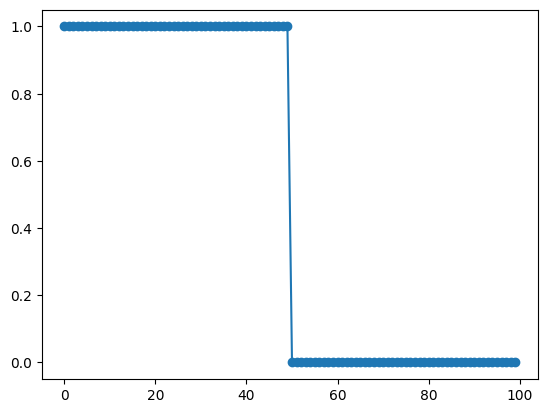

In [69]:
n = 100
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

/var/folders/1s/rksq8jbd5fz1bfhyqbh4w64c0000gn/T/ipykernel_74395/2595070907.py:6: RuntimeWarning: invalid value encountered in divide
  H = ((4 * wavenum(w,M)**2 - np.pi**2) * np.sin(wavenum(w,M)) - 2 * np.pi * wavenum(w,M) * np.cos(wavenum(w,M))) / (4 * wavenum(w,M)**3 - np.pi**2 * wavenum(w,M))


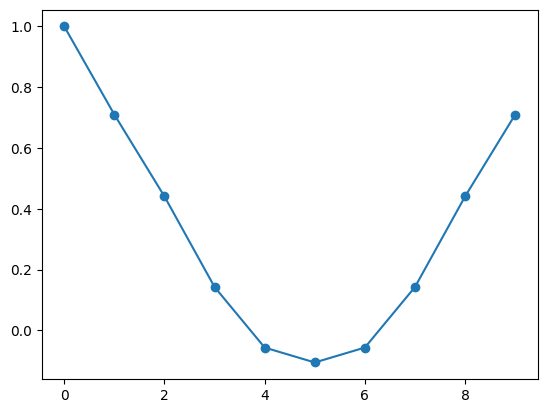

In [72]:
# Create filter.
M = 10
delta = 20
w = np.arange(M)
# H = (-2 * wavenum(w,P) * np.sin(wavenum(w,P)))/(wavenum(w,P)**2 - np.pi**2)
H = ((4 * wavenum(w,M)**2 - np.pi**2) * np.sin(wavenum(w,M)) - 2 * np.pi * wavenum(w,M) * np.cos(wavenum(w,M))) / (4 * wavenum(w,M)**3 - np.pi**2 * wavenum(w,M))
H[0] = 2

H = H * np.exp(-2j * np.pi * delta * wavenum(w,M)/M)
H /= 2
plt.plot(w,H, marker ='o')

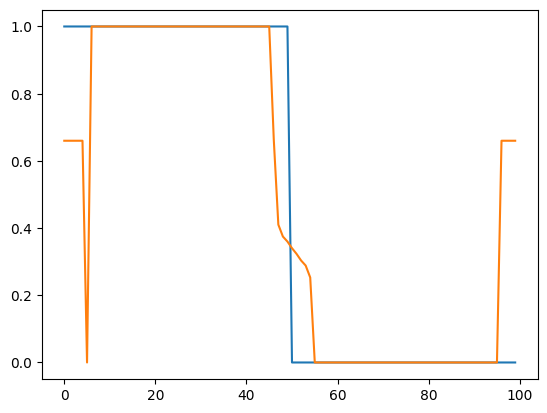

In [73]:
# Apply filter to each point of y
h = np.fft.ifft(H)

x_shifted_filter = np.zeros(n, dtype=complex)

# x_shifted_filter = np.convolve(X,h, 'same')
# x_shifted_filter /= (M/2)

# x_shifted_filter = convolve_1d(x_shifted, H)

for i in range(n):
    A = 0   
    
    # At the beginning
    if i - M//2 < 0:
        for j in range(n - M // 2, n):
            A += X[j] * h[j % M]
        for j in range(0, M // 2):
            A += X[j] * h[j % M]
        # print(i)
            
            
    # At the end
    elif i + M // 2 > n:
        for j in range(i - M // 2, n):
            A += X[j] * h[j % M]
        for j in range(0, M // 2):
            A += X[j] * h[j % M]
        # print(i)
        
    # In the middle.
    elif i > M // 2 and i + M // 2  < n:
        for j in range(i - M//2, i + M//2):
            A += X[j] * h[j % M] 
            
        # print(i)
    x_shifted_filter[i] = A

# x_shifted_filter /= M
plt.plot(x,X)
# plt.plot(x,x_shifted.real)
plt.plot(x,x_shifted_filter)